### Feature Selection - Information Gain - Mutual Information in Regression Problem Statements

##### Mutual Information

MI Estimate mutual information for a continuous target variable

   Mutual Information(MI) between two random variables is a non-negative value,which measures the dependency between the variables.
    It is equal to zero if and only if two random variables independent, and higher values means higher dependency.
    
   The function relies on nonparametric methods based on entropy estimation from k-nearest neighbours distances.
   
   In Short,
   
   A quantity called mutual information measures the amount of information one can obtained from one random variable given another.
   
   The Mutual Information between two random variables X and Y can be stated formally as follows:
   
###### |(X;Y) = H(X) - H(X|Y) Where |(X;Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X|Y) is the conditional entropy for X given Y.The result has the units of bits.It means range(0 to 1)
   

#### Requirements:

- Know about Entropy
- Know about Information Gain
- Know about Gini Impurity
- Know about Statistical test

These concepts are available in ML and Inferential Statistics

In [35]:
# See the usage of Information Gain - Mutual Information in Regression Problem Statements

import pandas as pd

df = pd.read_csv('D:\\Feature Selection\\Datasets\\House Price Datasets\\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
# Iam taking only numerical column because i do not much focus on feature engineering and one hot encoding

numeric_list = ['int16','int32','int64','float16','float32','float64']
numeric_col = list(df.select_dtypes(include=numeric_list).columns)

In [38]:
numeric_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [39]:
# Replace..
df = df[numeric_col]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [40]:
# ID is not required so remove it

df = df.drop('Id',axis = 1)

In [41]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [47]:
# Before Performing the Mutual Information it always good to do for train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels = ['SalePrice'],axis = 1),df['SalePrice'],test_size=0.3,random_state=34)

In [48]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,...,624,0,0,0,0,0,0,0,7,2006
343,120,63.0,8849,9,5,2005,2005,616.0,28,0,...,564,495,72,0,0,0,0,0,7,2008
290,60,120.0,15611,8,5,2006,2006,0.0,0,0,...,685,0,51,0,0,0,0,0,7,2006
163,45,55.0,5500,4,6,1956,1956,0.0,0,0,...,0,0,0,0,0,0,0,0,4,2007
234,60,NaN,7851,6,5,2002,2002,NaN,625,0,...,440,288,48,0,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,80,96.0,11275,7,7,1967,2007,300.0,0,0,...,564,240,0,0,0,0,0,0,6,2010
1109,20,107.0,11362,8,5,2004,2005,42.0,1039,0,...,862,125,185,0,0,0,0,0,3,2009
490,160,NaN,2665,5,6,1976,1976,0.0,0,0,...,336,141,24,0,0,0,0,0,6,2008
1146,20,NaN,11200,6,5,1985,1985,85.0,1258,0,...,403,165,26,0,0,0,0,0,5,2006


In [49]:
y_train

512     129900
343     266000
290     233230
163     103200
234     216500
         ...  
324     242000
1109    280000
490     115000
1146    180000
1441    149300
Name: SalePrice, Length: 1022, dtype: int64

In [51]:
# Checking the null values
X_train.isnull().sum()

MSSubClass         0
LotFrontage      171
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         4
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       57
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Using feature engineering to fill NAN values.But we just skip now...because it takes many times

In [53]:
# fill Nan values 0 in X_train for tutorial purpose
X_train = X_train.fillna(0)
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,...,624,0,0,0,0,0,0,0,7,2006
343,120,63.0,8849,9,5,2005,2005,616.0,28,0,...,564,495,72,0,0,0,0,0,7,2008
290,60,120.0,15611,8,5,2006,2006,0.0,0,0,...,685,0,51,0,0,0,0,0,7,2006
163,45,55.0,5500,4,6,1956,1956,0.0,0,0,...,0,0,0,0,0,0,0,0,4,2007
234,60,0.0,7851,6,5,2002,2002,0.0,625,0,...,440,288,48,0,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,80,96.0,11275,7,7,1967,2007,300.0,0,0,...,564,240,0,0,0,0,0,0,6,2010
1109,20,107.0,11362,8,5,2004,2005,42.0,1039,0,...,862,125,185,0,0,0,0,0,3,2009
490,160,0.0,2665,5,6,1976,1976,0.0,0,0,...,336,141,24,0,0,0,0,0,6,2008
1146,20,0.0,11200,6,5,1985,1985,85.0,1258,0,...,403,165,26,0,0,0,0,0,5,2006


In [54]:
# Performing Mutual Information for Regression Problem
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.25756178, 0.19868727, 0.13531641, 0.56225566, 0.11208768,
       0.36172538, 0.27337803, 0.09327001, 0.13978895, 0.01532357,
       0.13610507, 0.38067788, 0.32071918, 0.19541872, 0.        ,
       0.49505008, 0.0166318 , 0.00191062, 0.24936028, 0.0724949 ,
       0.07733814, 0.02798184, 0.20165424, 0.15814951, 0.26972895,
       0.37660596, 0.3469271 , 0.10364628, 0.17873111, 0.0192269 ,
       0.        , 0.01784443, 0.00485903, 0.00164594, 0.00568603,
       0.0161734 ])

In [56]:
# Iam just mutual_info to pandas series
mutual_info = pd.Series(mutual_info)
# Pandas need to match index
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.562256
GrLivArea        0.495050
TotalBsmtSF      0.380678
GarageCars       0.376606
YearBuilt        0.361725
GarageArea       0.346927
1stFlrSF         0.320719
YearRemodAdd     0.273378
GarageYrBlt      0.269729
MSSubClass       0.257562
FullBath         0.249360
TotRmsAbvGrd     0.201654
LotFrontage      0.198687
2ndFlrSF         0.195419
OpenPorchSF      0.178731
Fireplaces       0.158150
BsmtFinSF1       0.139789
BsmtUnfSF        0.136105
LotArea          0.135316
OverallCond      0.112088
WoodDeckSF       0.103646
MasVnrArea       0.093270
BedroomAbvGr     0.077338
HalfBath         0.072495
KitchenAbvGr     0.027982
EnclosedPorch    0.019227
ScreenPorch      0.017844
BsmtFullBath     0.016632
YrSold           0.016173
BsmtFinSF2       0.015324
MoSold           0.005686
PoolArea         0.004859
BsmtHalfBath     0.001911
MiscVal          0.001646
LowQualFinSF     0.000000
3SsnPorch        0.000000
dtype: float64

<Axes: >

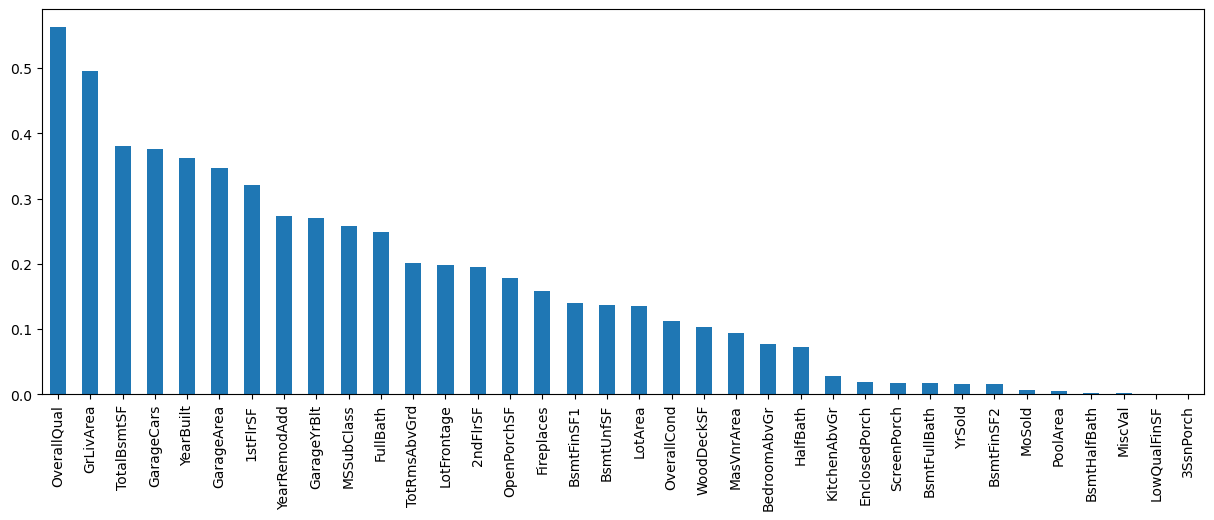

In [58]:
# Visualize
mutual_info.sort_values(ascending = False).plot.bar(figsize=(15,5))

In [60]:
# The previous mutual information on classification problem we select using selectKbest but now we select using percentile
# Its our choice to use both selection method
# The percentile selection select the things upto specified our value

# Selecting top 20 percentile

from sklearn.feature_selection import SelectPercentile 

select_top_columns = SelectPercentile(mutual_info_regression,percentile = 20)
select_top_columns.fit(X_train,y_train)
X_train.columns[select_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [62]:
select_top_columns.get_support()  # It indicates which column meets top 20 percentile that was true

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])